In [200]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet # for using L1 (Lasso) and L2 (Ridge) regularization
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [183]:
# Read in breast cancer data set
df_orig = pd.read_csv("C:/Users/celin/OneDrive/Education/USD-MS-ADS/ADS-502-Applied-Data-Mining/Final-Project/breast-cancer.csv")

In [154]:
df_orig.shape

(569, 32)

In [155]:
df_orig.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [156]:
# Rename feature names to remove spaces
df_orig.columns = df.columns.str.replace(' ', '_')

In [157]:
# Drop the id column
df_orig = df.drop(['id'], axis=1)

In [158]:
# One-hot encode the diagnosis variable
diagnosis_hot = pd.get_dummies(df_orig, columns=['diagnosis'])

# Create a dictionary from the one-hot encoded variable
diagnosis_hot_dict = diagnosis_hot.to_dict(orient='records')

In [137]:
# Show the first record of the one-hot-encoded diagnosis dictionary
diagnosis_hot_dict[:1]

[{'radius_mean': 17.99,
  'texture_mean': 10.38,
  'perimeter_mean': 122.8,
  'area_mean': 1001.0,
  'smoothness_mean': 0.1184,
  'compactness_mean': 0.2776,
  'concavity_mean': 0.3001,
  'concave_points_mean': 0.1471,
  'symmetry_mean': 0.2419,
  'fractal_dimension_mean': 0.07871,
  'radius_se': 1.095,
  'texture_se': 0.9053,
  'perimeter_se': 8.589,
  'area_se': 153.4,
  'smoothness_se': 0.006399,
  'compactness_se': 0.04904,
  'concavity_se': 0.05373,
  'concave_points_se': 0.01587,
  'symmetry_se': 0.03003,
  'fractal_dimension_se': 0.006193,
  'radius_worst': 25.38,
  'texture_worst': 17.33,
  'perimeter_worst': 184.6,
  'area_worst': 2019.0,
  'smoothness_worst': 0.1622,
  'compactness_worst': 0.6656,
  'concavity_worst': 0.7119,
  'concave_points_worst': 0.2654,
  'symmetry_worst': 0.4601,
  'fractal_dimension_worst': 0.1189,
  'diagnosis_B': False,
  'diagnosis_M': True}]

In [159]:
# Convert the one-hot-encoded dictionary to a DataFrame
df = pd.DataFrame(diagnosis_hot_dict)

In [160]:
# Partition the data into a training and a test set
df_train, df_test = train_test_split(df, test_size = 0.33, random_state = 7)

In [166]:
df_train.head(2)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_B,diagnosis_M
350,11.66,17.07,73.7,421.0,0.07561,0.0363,0.008306,0.01162,0.1671,0.05731,...,83.61,542.5,0.09958,0.06476,0.03046,0.04262,0.2731,0.06825,True,False
259,15.53,33.56,103.7,744.9,0.10630,0.1639,0.175100,0.08399,0.2091,0.06650,...,126.30,1035.0,0.18830,0.55640,0.57030,0.20140,0.3512,0.12040,False,True


In [167]:
# Separate the numeric predictor variables into their own data frame for the training and test data sets
numeric_df_train = df_train.select_dtypes(include=['number'])

numeric_df_test = df_test.select_dtypes(include=['number'])

In [169]:
# Separate the variables into predictor variables X and response variable y for the training and test data sets.
X_train = pd.DataFrame(numeric_df_train)
y_train = pd.DataFrame(df_train[['diagnosis_B', 'diagnosis_M']])

X_test = pd.DataFrame(numeric_df_test)
y_test = pd.DataFrame(df_test[['diagnosis_B', 'diagnosis_M']])


In [170]:
df_train.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,...,381.000000,381.000000,381.000000,381.000000,381.00000,381.000000,381.000000,381.000000,381.000000,381.000000
mean,14.313588,19.437323,93.263806,675.936745,0.096678,0.106311,0.093191,0.051141,0.181277,0.062675,...,16.541399,26.014987,109.102756,915.353281,0.13357,0.261002,0.283622,0.118353,0.292214,0.084362
std,3.716922,4.318701,25.631145,375.664699,0.014387,0.052574,0.081816,0.039829,0.026879,0.007068,...,5.068192,6.046595,35.086918,604.666249,0.02330,0.156569,0.207000,0.065635,0.059766,0.018094
min,7.691000,9.710000,47.920000,170.400000,0.052630,0.019380,0.000000,0.000000,0.116700,0.050240,...,8.678000,12.020000,54.490000,223.600000,0.08125,0.034320,0.000000,0.000000,0.164800,0.055250
25%,11.620000,16.580000,74.650000,412.600000,0.086940,0.066980,0.031930,0.020760,0.162100,0.057420,...,12.970000,21.740000,83.850000,508.100000,0.11720,0.154600,0.131600,0.067540,0.252700,0.071910
50%,13.470000,18.950000,87.320000,558.100000,0.096100,0.096970,0.067260,0.037380,0.179400,0.061480,...,15.150000,25.580000,99.480000,708.800000,0.13270,0.218600,0.243400,0.103500,0.284900,0.080090
75%,16.460000,21.880000,108.100000,832.900000,0.105900,0.130600,0.135400,0.077520,0.195000,0.066120,...,19.820000,30.290000,129.300000,1223.000000,0.14820,0.346300,0.394800,0.170800,0.318700,0.092410
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.290600,0.095750,...,36.040000,47.160000,251.200000,4254.000000,0.22260,1.058000,1.252000,0.291000,0.555800,0.207500


In [171]:
df_train.isnull().sum()

radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
diagnosis_B                0
diagnosis_M                0
dtype: int64

In [172]:
correlation_matrix = numeric_df_train.corr()
correlation_matrix

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.337299,0.998031,0.986791,0.161947,0.519663,0.687273,0.835665,0.166940,-0.329673,...,0.970377,0.300653,0.967956,0.940768,0.079572,0.409352,0.533343,0.753724,0.187094,-0.017864
texture_mean,0.337299,1.000000,0.341953,0.334999,-0.029134,0.242406,0.303165,0.310764,0.108840,-0.072822,...,0.377821,0.905787,0.382676,0.372458,0.049280,0.267844,0.285360,0.301183,0.144804,0.102344
perimeter_mean,0.998031,0.341953,1.000000,0.986204,0.197146,0.567024,0.723094,0.861414,0.197497,-0.282671,...,0.969080,0.304596,0.971542,0.940310,0.108096,0.447245,0.566249,0.776963,0.206614,0.021295
area_mean,0.986791,0.334999,0.986204,1.000000,0.169449,0.509782,0.699071,0.836060,0.170894,-0.301767,...,0.961444,0.289284,0.960073,0.958411,0.083701,0.382667,0.519793,0.728855,0.159569,-0.023435
smoothness_mean,0.161947,-0.029134,0.197146,0.169449,1.000000,0.654759,0.512963,0.536880,0.522908,0.577738,...,0.193272,0.036848,0.218986,0.189351,0.807103,0.460653,0.435772,0.498987,0.340976,0.488984
compactness_mean,0.519663,0.242406,0.567024,0.509782,0.654759,1.000000,0.871702,0.827163,0.569728,0.536167,...,0.531457,0.238034,0.581217,0.505754,0.539430,0.851226,0.811052,0.804146,0.466838,0.656341
concavity_mean,0.687273,0.303165,0.723094,0.699071,0.512963,0.871702,1.000000,0.918209,0.477331,0.316844,...,0.685282,0.286702,0.721820,0.676646,0.411552,0.717620,0.879333,0.849623,0.371379,0.472871
concave_points_mean,0.835665,0.310764,0.861414,0.836060,0.536880,0.827163,0.918209,1.000000,0.439189,0.137785,...,0.831385,0.297426,0.855405,0.810861,0.411924,0.641472,0.746967,0.907310,0.346878,0.329976
symmetry_mean,0.166940,0.108840,0.197497,0.170894,0.522908,0.569728,0.477331,0.439189,1.000000,0.426864,...,0.179496,0.118137,0.209836,0.173629,0.381278,0.432615,0.405996,0.391359,0.664540,0.378116
fractal_dimension_mean,-0.329673,-0.072822,-0.282671,-0.301767,0.577738,0.536167,0.316844,0.137785,0.426864,1.000000,...,-0.291059,-0.056480,-0.248230,-0.266187,0.508355,0.427027,0.334963,0.140404,0.256079,0.759651


We observe the correlation scatterplots for the first 16 columns, named axes, and then the remaining columns, named axes2, to determine which variables exhibit multicollinearity. We want to see no correlation when selecting variables for our analysis. Variables that exhibit linear or other relationships will be discarded.

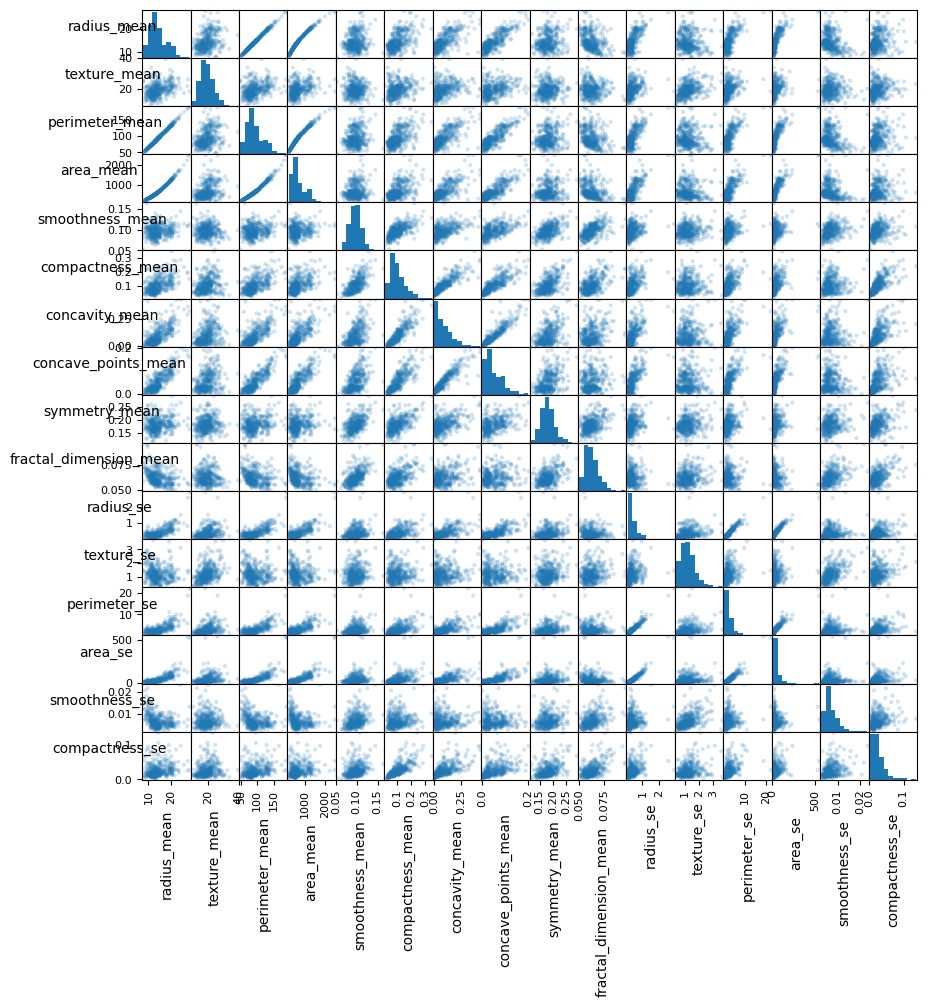

In [173]:
# Select only the first 16 columns
numeric_df_first_half = numeric_df_train.iloc[:, :16]

# Plotting the scatter matrix for the first 16 columns
axes = pd.plotting.scatter_matrix(numeric_df_first_half, alpha=0.2, figsize=(10, 10), diagonal='hist');

# Rotate the x-axis labels to be vertical and keep the y-axis labels horizontal
for ax in axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), rotation=90)  # Set x-label to vertical
    ax.set_ylabel(ax.get_ylabel(), rotation=0)   # Keep y-label horizontal

# Optionally, you can adjust the size of the labels for better readability
for ax in axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), fontsize=10)
    ax.set_ylabel(ax.get_ylabel(), fontsize=10)

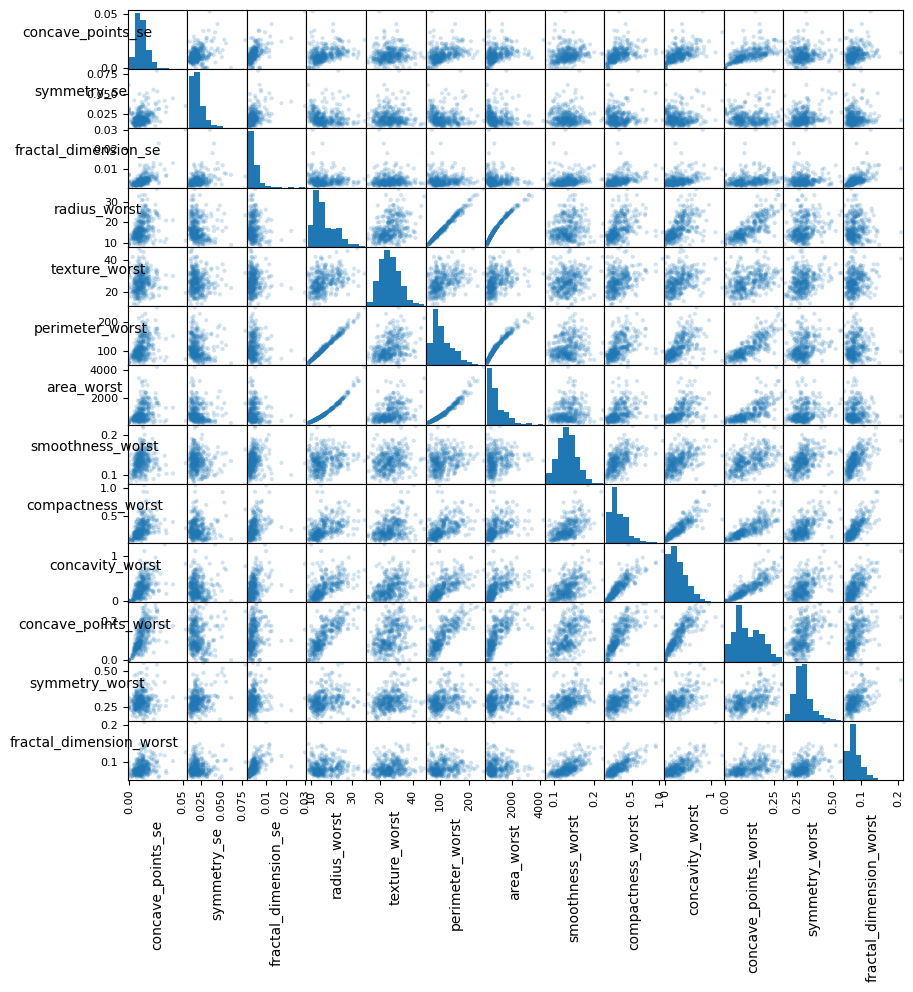

In [128]:
# Select the second half (columns 17 to 32) of the DataFrame
numeric_df_second_half = numeric_df_train.iloc[:, 17:31]

# Plotting the scatter matrix for the second half of the columns and suppressing the axes array output
axes2 = pd.plotting.scatter_matrix(numeric_df_second_half, alpha=0.2, figsize=(10, 10), diagonal='hist');

# Rotate the x-axis labels to be vertical and keep the y-axis labels horizontal
for ax in axes2.flatten():
    ax.set_xlabel(ax.get_xlabel(), rotation=90)  # Set x-label to vertical
    ax.set_ylabel(ax.get_ylabel(), rotation=0)   # Keep y-label horizontal

# Optionally, you can adjust the size of the labels for better readability
for ax in axes2.flatten():
    ax.set_xlabel(ax.get_xlabel(), fontsize=10)
    ax.set_ylabel(ax.get_ylabel(), fontsize=10)

In addition, three analyses will be performed to use the means only, then standard errors only, and lastly, worst only. For the first iteration, We will drop the means and standard error columns. An initial observation is that area_mean and perimeter_mean exhibit a linear relationship with radius_mean, naturally, since they are functions that use radius, so they will be dropped.

In [174]:
df_worst = df.drop(numeric_df_train.iloc[:, :20], axis=1)
df_worst

,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_B,diagnosis_M
0,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,False,True
1,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,False,True
2,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,False,True
3,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,False,True
4,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
564,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,False,True
565,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,False,True
566,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,False,True
567,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,False,True


Observing the correlation scatterplots, we see that area_worst has a much higher range than the other features. As a result, we will standardize this feature.

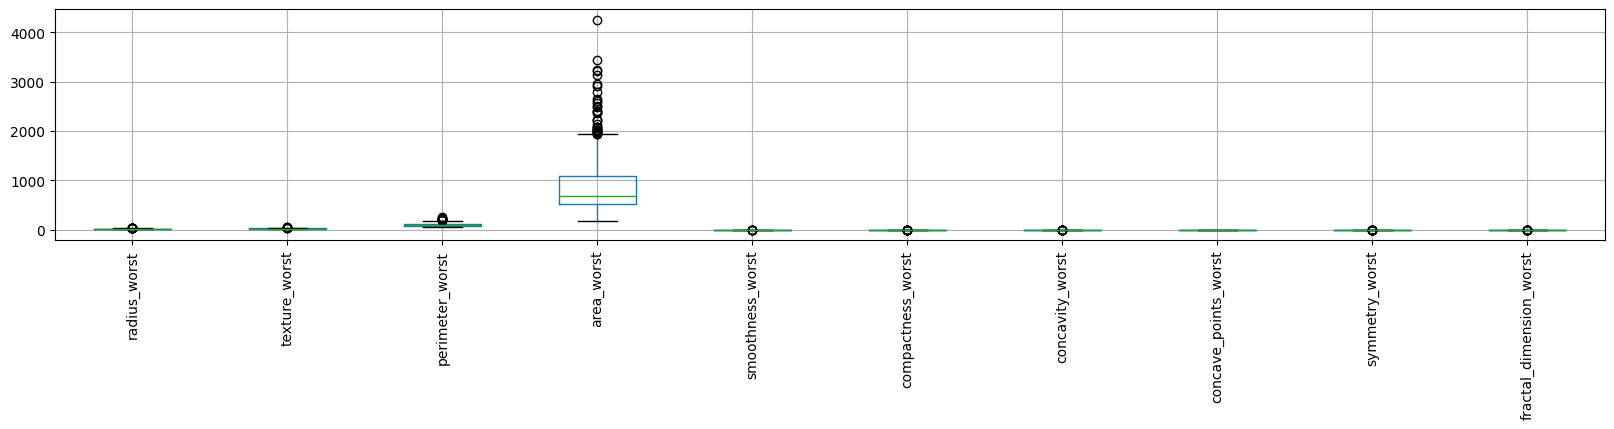

In [107]:
# Create boxplots of the features
bp = df_worst.boxplot(figsize=(20,3))

# Rotate the x-axis labels to be vertical
bp.set_xticklabels(bp.get_xticklabels(), rotation=90);

In [175]:
# Standardize the predictor variables using the z-score transformation and save the result as a data frame
X_train_z = pd.DataFrame(stats.zscore(X), columns=['radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst','concave_points_worst',
             'symmetry_worst','fractal_dimension_worst'])

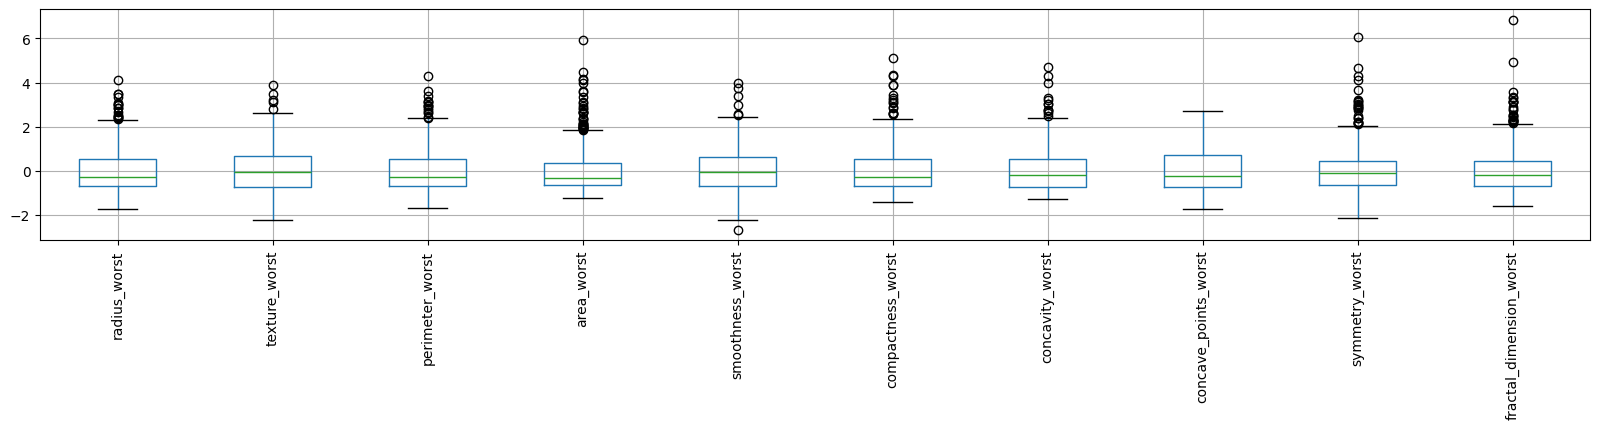

In [176]:
# Create new boxplots of the features
Xz_standard = Xz.boxplot(figsize=(20,3))

# Rotate the x-axis labels to be vertical
Xz_standard.set_xticklabels(bp.get_xticklabels(), rotation=90);

The scatterplots were recreated with the subset of "worst" data to analyze correlations between variables. Perimeter_worst, area_worst, and radius_worst are, naturally, correlated with each other. Since, according to Narasimha et al. (2013), "area, perimeter, diameter, concave points and compactness) of the nucleus" are relevant for predicting benignity or malignancy of tumors, the perimeter_worst and area_worst will be kept instead of the radius_worst feature. In addition, because concavity and concave_points exhibit heteroskedasticity (CFI Team, 2024), it is not advised to use K-means, and, instead, DBSCAN will be used (OpenAI, 2023).

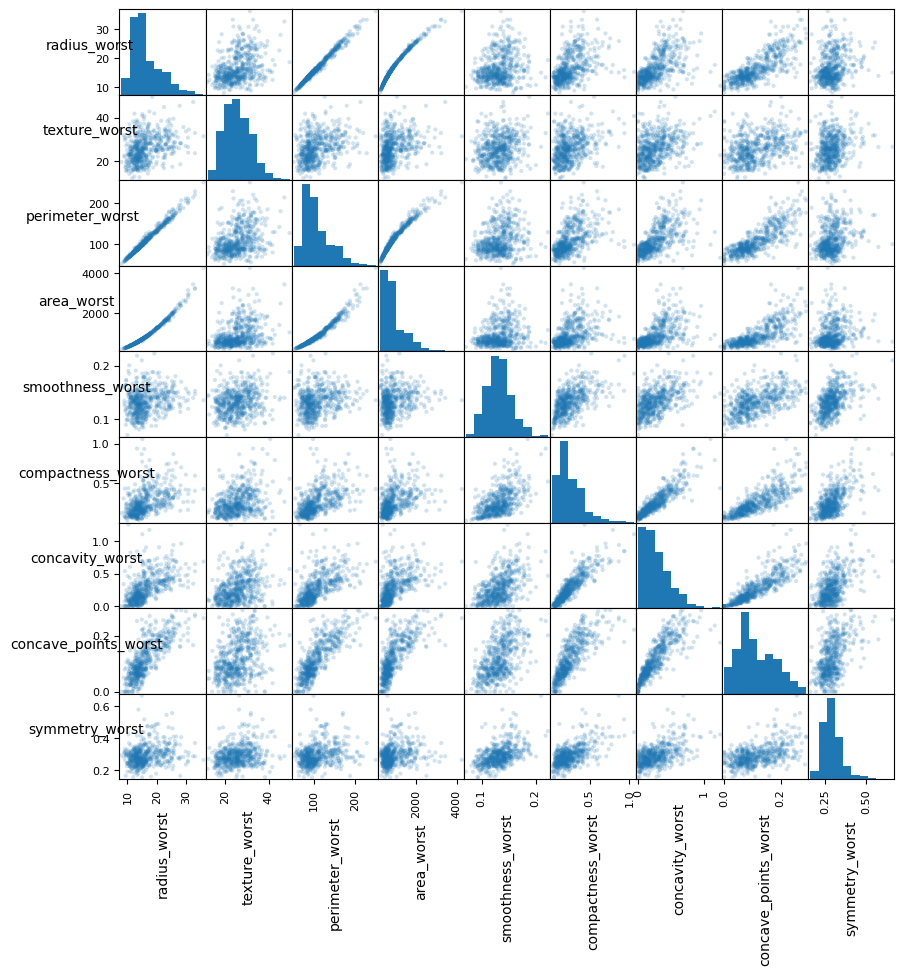

In [178]:
# Plotting the scatter matrix for the "worst" numeric columns only and suppressing the axes array output

# Select only the first 9 columns from the df_worst dataframe
numeric_df_worst = df_worst.iloc[:, :9]

axes3 = pd.plotting.scatter_matrix(numeric_df_worst, alpha=0.2, figsize=(10, 10), diagonal='hist');

# Rotate the x-axis labels to be vertical and keep the y-axis labels horizontal
for ax in axes3.flatten():
    ax.set_xlabel(ax.get_xlabel(), rotation=90)  # Set x-label to vertical
    ax.set_ylabel(ax.get_ylabel(), rotation=0)   # Keep y-label horizontal

# Optionally, you can adjust the size of the labels for better readability
for ax in axes3.flatten():
    ax.set_xlabel(ax.get_xlabel(), fontsize=10)
    ax.set_ylabel(ax.get_ylabel(), fontsize=10)

In [179]:
# Drop the radius_worst column
df_worst = df_worst.drop(['radius_worst'], axis=1)

In [181]:
df_worst.head(1)

,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_B,diagnosis_M
0,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189,False,True


In [184]:
# Create a cross tabulation of the target variable, diagnosis
length = len(df_orig)
crosstab_01 = pd.crosstab(length, df_orig['diagnosis'])
crosstab_01

diagnosis,B,M
row_0,,
569,357,212


In [185]:
# Create a normalized table
crosstab_norm = crosstab_01.div(crosstab_01.sum(1), axis = 0)
crosstab_norm

diagnosis,B,M
row_0,,
569,0.627417,0.372583


Text(0, 0.5, 'Proportion of Total Diagnoses')

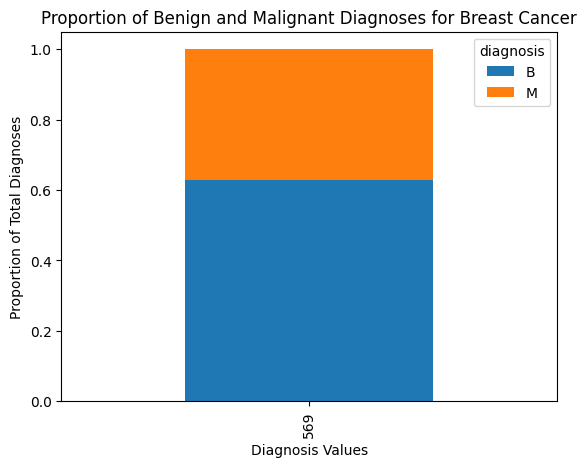

In [186]:
# Create the bar graph based on the cross tabulation
crosstab_norm.plot(kind = 'bar', stacked = True)

# Change the x-axis label
plt.xlabel('Diagnosis Values')

# Optional: You can also change other aspects like title, y-axis label, etc.
plt.title('Proportion of Benign and Malignant Diagnoses for Breast Cancer')
plt.ylabel('Proportion of Total Diagnoses')

The target variable, diagnosis, was analyzed for class imbalance using the Imbalance Ratio (IR), calculated as IR = N_maj/N_min, where N_maj and N_min represent the number of instances in the majority and minority classes, respectively (Salmi, 2024). The imbalance ratio is 1.68. When analyzing binary data, the imbalance ratio is calculated as IR:1, i.e. 1.68:1, "where the more significant the difference than 1, the more severe the imbalance is" (Salmi, 2024). The ratio does not have a severe imbalance, so it was not necessary to manage class imbalance for this analysis.

In [192]:
# Build the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_dim=X_train.shape[1], activation='relu'),  # Input layer with 10 neurons
    tf.keras.layers.Dense(10, activation='relu'),  # Hidden layer with 10 neurons
    tf.keras.layers.Dense(2, activation='softmax')  # Output layer with 2 neurons (for one-hot-encoded binary class)
])

In [194]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [196]:
# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=0)

In [201]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc:.4f}')

# Make predictions on new data
predictions = model.predict(X_test)
print(f'Predictions:\n{np.argmax(predictions, axis=1)}')

6/6 [==============================] - 0s 2ms/step - loss: 0.1435 - accuracy: 0.9468
Test accuracy: 0.9468
6/6 [==============================] - 0s 1000us/step
Predictions:
[0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0
 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0
 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0
 1 0 0]


# References
Narasimha, A., Vasavi, B., & Kumar, H. M. L. (2013). Significance of nuclear morphometry in benign and malignant breast aspirates. International Journal of Applied & Basic Medical Research, 14(4). https://doi.org/10.4103/2229-516X.112237

OpenAI. (2023). ChatGPT (Mar 14 version) [Large language model]. https://chat.openai.com/chat

Salmi, M., Atif, D., Oliva, D., Abraham, A., & Ventura, S. (2024, September 2). Handling Imbalanced Medical Datasets: Review of a Decade of Research. Springer Nature Link. https://link.springer.com/article/10.1007/s10462-024-10884-2#:~:text=While%20naturally%20unhealthy%20people%20are,the%20extent%20of%20this%20disproportion. 